# Global warming text analysis 

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation

# Load the dataset

In [2]:
url = '/home/1377884570_tweet_global_warming.csv'
df1 = pd.read_csv(url, encoding='latin1', engine='python')

# Quick view of the dataset

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet                 6090 non-null   object 
 1   existence             4225 non-null   object 
 2   existence.confidence  6087 non-null   float64
dtypes: float64(1), object(2)
memory usage: 142.9+ KB


In [ ]:
df1.head(50)

# TODO:

**Analysez** le dataset.

Vous avez remarqué des **incoherences** ? Des **données abherentes** ? Le texte a t-il besoin de **nettoyage** ? 

Normalisez les données/labels si besoin
Appliquez les etapes de nettoyage/cleaning qui vous paraissent necessaires 

# Plot frequencies

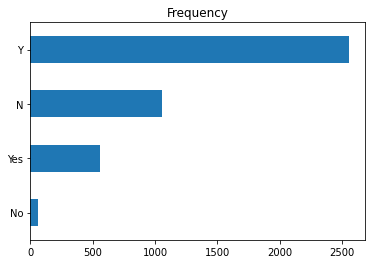

In [6]:
df1["existence"].value_counts(ascending=True).plot.barh()
plt.title("Frequency")
plt.show()

# TODO

Une fois le dataset nettoyé refaites le plot des frequences de labels.

Calculez la longueur des tweets par label. 
Il y a une differences entre les tweets apartenant au label "yes" et ceux appartenant au label "no"?  

# NLP analysis

In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.matcher import DependencyMatcher

In [21]:
#get the list of tweets
tweets = list(df1.tweet)

In [29]:

topic_labels = [
  'nature',
  'politics',
  'environment'
]

In [30]:
# Chosen arbitrarily 
topic_keywords = [
  'snowfall whte bear glaciers storm snowbomb meltdown',
  'leader democratic capitalism manipulation liberal government abnormal change',
  'green climate change ecological eco'
]


In [32]:
import itertools
import numpy as np
# Use pipe to run this in parallel
topic_docs = list(nlp.pipe(topic_keywords,
  batch_size=10000,
  ))
topic_vectors = np.array([doc.vector 
  if doc.has_vector else spacy.vocab[0].vector
  for doc in topic_docs])
print("Vector for topic %s:", topic_labels[0])
print(topic_vectors[0])

Vector for topic %s: nature
[ 5.11548281e-01 -2.64578432e-01  1.44066468e-01 -1.94769755e-01
  3.89369205e-02  5.82598150e-01 -2.50125706e-01 -9.75970402e-02
  5.83755493e-01 -1.46185637e-01  2.06634536e-01  6.66693807e-01
 -2.88741767e-01 -5.80096066e-01 -1.64504454e-01 -1.34393405e-02
  2.17100307e-01 -1.51860982e-01 -8.66471604e-02  5.53968012e-01
  1.95934057e-01 -4.62663800e-01  1.49619669e-01  9.17627960e-02
  3.42530042e-01  2.42334276e-01 -7.03493655e-01  5.03427327e-01
 -5.07964455e-02  2.22293690e-01  3.89440283e-02  2.15174064e-01
 -8.60393345e-01 -8.88708159e-02  4.49625283e-01  1.62346125e-01
 -1.13951992e-02  4.18504775e-01 -5.31032026e-01  9.25653428e-02
 -7.67507330e-02  4.45544243e-01  1.23334132e-01 -1.16211700e+00
  3.25070649e-01 -2.49678135e-01  5.25777601e-02  4.55894649e-01
 -4.69502836e-01 -8.39840472e-01  7.30704308e-01 -7.56349191e-02
 -1.17237769e-01 -6.13697708e-01 -3.53049755e-01  1.78700522e-01
  4.50498581e-01 -3.32672417e-01 -7.86592782e-01 -2.17945382e-

In [22]:
#create a linguistic pattern
pattern = [
  {
    "RIGHT_ID": "target",
    "RIGHT_ATTRS": {"POS": "NOUN"}
  },
  # founded -> subject
  {
    "LEFT_ID": "target",
    "REL_OP": ">",
    "RIGHT_ID": "modifier",
    "RIGHT_ATTRS": {"DEP": {"IN": ["amod", "nummod"]}}
  },
]

In [50]:
def get_kw_patterns(pattern, sentence):
  matcher = DependencyMatcher(nlp.vocab)
  matcher.add("FOUNDED", [pattern])
  doc = nlp(sentence)
  #get all matches
  all_matches = list()
  for match_id, (target, modifier) in matcher(doc):
    all_matches.append((str(doc[modifier]).lower(), str(doc[target]).lower()))
  # create kw list
  keywords = [" ".join(kw) for kw in all_matches]  
  return keywords 

In [67]:
sent = tweets[26]

In [68]:
keywords = get_kw_patterns(pattern, sent)

In [69]:
keywords

['global change']

In [70]:
keyword_docs = list(nlp.pipe(keywords,
  batch_size=10000,))
keyword_vectors = np.array([doc.vector
  if doc.has_vector else spacy.vocab[0].vector
  for doc in keyword_docs])
print("Vector for keyword %s:" % keywords[0])
print(keyword_vectors[0])

Vector for keyword global change:
[ 0.3438513   0.57204276  0.26612872  0.58319193 -0.27236512  0.05239721
 -0.13112436 -0.12503345 -0.10316981 -0.37859276  0.53588873  0.27001587
  0.66621816 -0.8855058   0.20816246 -0.00249104  0.39507186  0.72177804
 -1.0171735  -0.26072863  0.0903251  -0.5546582  -0.47999576  1.0581907
  1.6625006   0.30354953  0.17395356 -0.6366391  -0.6608418   0.94736814
  0.3440268   0.20658597  0.25464988 -0.33546442  0.18609089 -0.11988345
  0.12468988  0.8243054  -0.7854944  -0.46514603  0.11721417 -0.15535276
  0.59888464 -0.86175025 -0.5156381  -0.6242146  -0.5344745   0.5934243
  0.6711304  -0.33834577 -0.22651933 -0.5322237  -1.2647429  -1.1940093
  0.35755953 -0.72672635  1.0676703  -0.74915045 -0.139702    0.16153026
  0.43579105 -0.48837522  0.8700551  -0.21159081 -0.58540195 -0.505837
  0.10230208  0.5500139  -0.91487205 -0.8405361  -0.29055062  0.18826851
 -0.02133946  0.11594041 -0.02756867  0.33656314  0.01420236  0.16735606
 -1.1322609   0.573899

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
# use numpy and scikit-learn vectorized implementations for performance
simple_sim = cosine_similarity(keyword_vectors, topic_vectors)
topic_idx = simple_sim.argmax(axis=1)
print(simple_sim)

[[0.4417237 0.6645479 0.6607183]]


In [73]:
for k, i in zip(keywords, topic_idx):
  print(sent)
  print("%s is about %s" %(k, topic_labels[i]))

It's global climate change-not warming. #ac Read: www.associatedcontent.com/article/2872954/global_climate_change_not_global_warming.html
global change is about politics


# TODO:

Analysez les resultats ? 

Etes-vous satisfaits de la classification de keywords ? 

Comment l'améliorer ?

Testez différents patterns d'extraction de keywords.

Proposez une meilleure classification de ces keywords.

Proposez une méthode qui analyse les tweets en fonction de leurs labels.

Il y t-il une différence entre les keywords du label "yes" et ceux du label "no" ? 
